In [15]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np

In [16]:

#################################
# Tweakable Settings
#################################
# Path pattern to load images
IMAGE_GLOB = "capture/myscan_*.jpeg"  # e.g., "capture/myscan_0_*.jpeg" if needed

# Stitcher mode can be cv2.Stitcher_PANORAMA or cv2.Stitcher_SCANS.
#  - PANORAMA is the default (assumes images were taken from a single camera center, rotating).
#  - SCANS is often better for a flat scan or mosaic from translational moves.
STITCH_MODE = cv2.Stitcher_SCANS  # or cv2.Stitcher_PANORAMA

# Some cameras produce EXIF data that can break stitching due to orientation tags.
# If your images appear rotated, try ignoring that data or rotating them after load.

In [17]:

#################################
# Load images
#################################
image_files = sorted(glob.glob(IMAGE_GLOB))

images = []
for fname in image_files:
    img = cv2.imread(fname)
    if img is not None:
        # (Optional) If your circle is small and there's a lot of black, you might
        # want to crop away some of the border to reduce black area. Example:
        # h, w = img.shape[:2]
        # crop_border = 50
        # img = img[crop_border:h-crop_border, crop_border:w-crop_border]
        images.append(img)
    else:
        print(f"Warning: could not read {fname}")

print(f"Loaded {len(images)} images for stitching.")

Loaded 9 images for stitching.


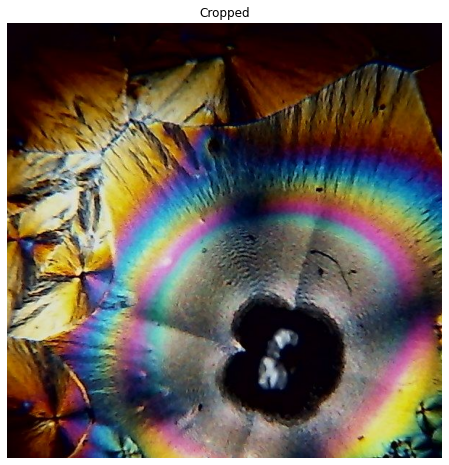

In [18]:
w = 600
x1, x2 = (1920//2 - w//2, 1920//2 + w//2)
y1, y2 = (1080//2 - w//2, 1080//2 + w//2)
cropped = images[0][y1:y2, x1:x2]
cropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,8))
plt.imshow(cropped)
plt.axis('off')
plt.title("Cropped")
plt.show()

In [19]:
# Crop them all
images = [img[y1:y2, x1:x2] for img in images]

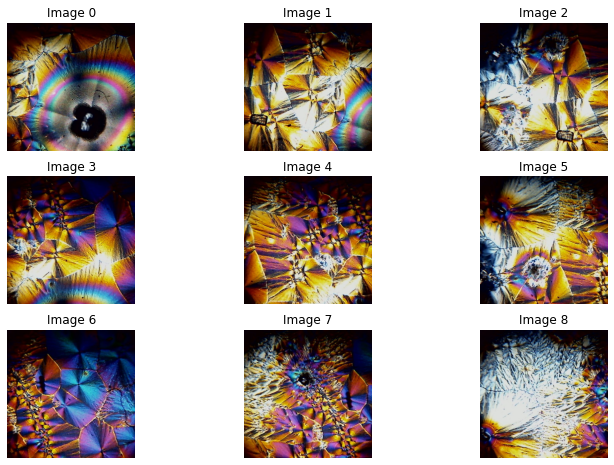

In [20]:
# Show all in a 3x3 grid
plt.figure(figsize=(12,8))
for i, img in enumerate(images):
    plt.subplot(3, 3, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Image {i}")

Stitching succeeded. Result is in 'stitched'.


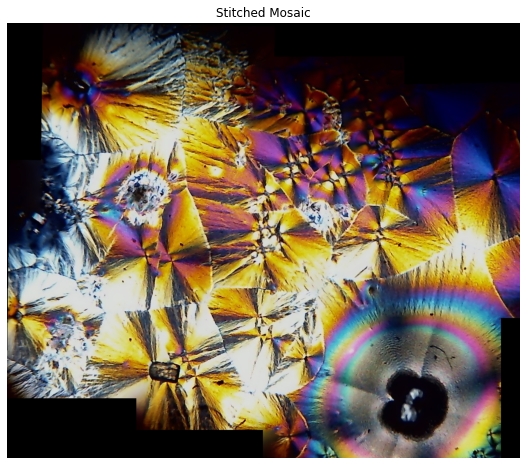

Saved mosaic_result.jpg


In [21]:

#################################
# Create the stitcher and set its mode
#################################
stitcher = cv2.Stitcher_create(mode=STITCH_MODE)

# Optionally, we can tweak some parameters:
stitcher.setPanoConfidenceThresh(0.5)
stitcher.setCompositingResol(1) # 1 means full resolution
stitcher.setSeamEstimationResol(0.05) # relative to full resolution
#   stitcher.setWarper(cv2.PyRotationWarper(300))  # Example warper, can help or hurt

#################################
# Perform the stitch
#################################
(status, stitched) = stitcher.stitch(images)

if status != cv2.Stitcher_OK:
    print("Stitching failed with error code:", status)
else:
    print("Stitching succeeded. Result is in 'stitched'.")

    # Show in notebook
    stitched_rgb = cv2.cvtColor(stitched, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12,8))
    plt.imshow(stitched_rgb)
    plt.axis('off')
    plt.title("Stitched Mosaic")
    plt.show()

    # Optionally save to disk
    cv2.imwrite("mosaic_result.jpg", stitched, [int(cv2.IMWRITE_JPEG_QUALITY), 90])
    print("Saved mosaic_result.jpg")
